Döviz sitesi üzerinden bankaların Sterlin alış ve satış değerlerini Pandas dataframeine koyup scatter plot şeklinde ekrana bastıracağız:

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
import seaborn as sns

In [101]:
driver_path = r"C:\Users\muham\selenium\chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
driver.get("https://kur.doviz.com/serbest-piyasa/sterlin")
table = driver.find_element_by_xpath("/html/body/div[5]/div[2]/div[1]/div[5]/div").get_attribute('outerHTML')
table_list  = pd.read_html(table,decimal=',', thousands='.')
df = pd.concat([table_list[0],table_list[1]])
df.reset_index(inplace=True)

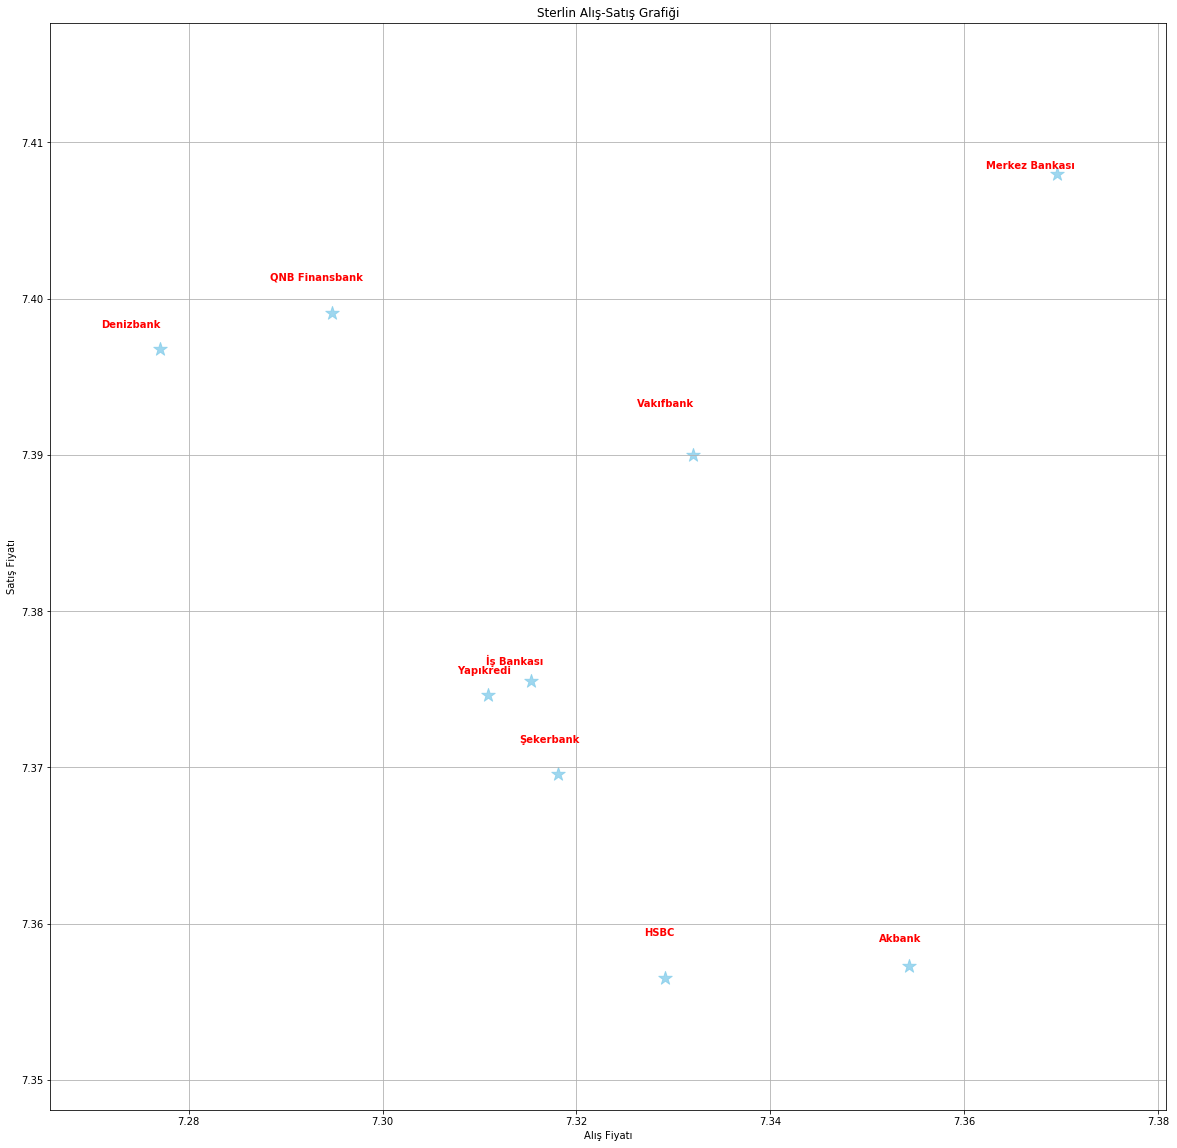

In [110]:
plt.figure(figsize=(20,20))
plt.grid()
p1=sns.regplot(data=df, x="Alış", y="Satış", fit_reg=False, marker="*", color="skyblue", scatter_kws={'s':200})
plt.title("Sterlin Alış-Satış Grafiği")
plt.xlabel('Alış Fiyatı')
plt.ylabel('Satış Fiyatı') 
for line in range(0,df.shape[0]):
     p1.text(df.Alış[line]+np.random.random_sample()/300, df.Satış[line]+np.random.random_sample()/300, df.Banka[line], horizontalalignment='right', size='medium', color='red', weight='semibold')
plt.show()